Importanto bibliotecas necessárias

In [8]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Introdução


**Contextualização**



**Tema e Objetivo**


**Base de Dados**


# Manipulando as planilhas de dados

In [26]:
dados_aguafiltrada0 =  pd.read_excel('planilhas/Água_Filtrada_por_município.xlsx')
dados_popmunicipio0 =  pd.read_excel('planilhas/População_Residente_por_Múnicipio.xlsx')
dados_pib0 = pd.read_excel('planilhas/Pib_per_capita_por_municipio.xlsx')
dados_idososcasas0 = pd.read_excel('planilhas/Porcentagem_de_Idosos_nas_Casas.xlsx')
dados_lixo0 = pd.read_excel('planilhas/Lixo_Municipio.xlsx')
dados_desemprego0 = pd.read_excel('planilhas/Taxa_de_desemprego.xlsx')
dados_analfabetismo0 = pd.read_excel('planilhas/Taxa_de_anafalbetismo.xlsx')
dados_coberturavacinal0 = pd.read_excel('planilhas/Cobertura_vacinal.xlsx')
dados_cobequipessaudebasica0 = pd.read_excel('planilhas/Cobertua_equipe_ atenção_básica_por_Município.xlsx')
dados_pessoasbaixarenda0 = pd.read_excel('planilhas/Porcentagem_de_Pessoas_Baixa_Renda.xlsx')
dados_escolariedade0 = pd.read_excel('planilhas/Escolariedade.xlsx')
dados_tuberculose0 = pd.read_excel('planilhas/Tuberculose.xlsx')
dados_idadepopulacional = pd.read_excel('planilhas/Idade_população.xlsx')
dados_tuber_com_deabetitis= pd.read_excel('planilhas/Tuberculosos_com_diabetes.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'planilhas/Tuberculosos_com_diabetes.xlsx'

### Limpando as planilhas de dados

In [23]:
dados_tuber_com_deabetitis.tail(40)

NameError: name 'dados_tuber_com_deabetitis' is not defined

In [11]:
#Função de limpeza
#Função que separa o código do nome do município
def separa_codigo(planilha):
    planilha[['Código do Município', 'Nome do Município']] = planilha['Município'].str.split(' ', n=1, expand=True)
    plan = planilha.drop('Município', axis=1)
    planilha_limpa = plan.drop('Nome do Município', axis=1)
    return planilha_limpa

- Limpando dados do DataSus

In [12]:
#Limpa linhas inúteis
df_aguafiltrada = dados_aguafiltrada0.drop(dados_aguafiltrada0.index[-2:])
df_popmunicipio = dados_popmunicipio0.drop(dados_popmunicipio0.index[-4:])
df_pib = dados_pib0.drop(dados_pib0.index[-11:])
df_idososcasas= dados_idososcasas0.drop(dados_idososcasas0.index[-4:])
df_lixo1 = dados_lixo0.drop(dados_lixo0.index[-2:])
df_lixo = df_lixo1.drop(labels=['Outro destino', 'Total'], axis=1)
df_desemprego = dados_desemprego0.drop(dados_desemprego0.index[-8:])
df_analfabetismo = dados_analfabetismo0.drop(dados_analfabetismo0.index[-4:])
df_coberturavacinal = dados_coberturavacinal0.drop(dados_coberturavacinal0.index[-3:])
df_cobequipessaudebasica = dados_cobequipessaudebasica0.drop(dados_cobequipessaudebasica0.index[-22:])
df_pessoasbaixarenda = dados_pessoasbaixarenda0.drop(dados_pessoasbaixarenda0.index[-10:])
df_escolariedade = dados_escolariedade0.drop(dados_escolariedade0.index[-8:])
df_tuberculose = dados_tuberculose0.drop(dados_tuberculose0.index[-36:])
df_idadepopulacional = dados_idadepopulacional

#Separa os códios dos nomes e deixa as planilhas prontas para mergir
df_aguafiltrada[['Código do Município', 'Nome do Município']] = df_aguafiltrada['Município'].str.split(' ', n=1, expand=True)
dados_aguafiltrada = df_aguafiltrada.drop('Município', axis=1)
dados_popmunicipio = separa_codigo(df_popmunicipio)
dados_pib = separa_codigo(df_pib)
dados_idososcasas= separa_codigo(df_idososcasas)
dados_lixo = separa_codigo(df_lixo)
dados_desemprego = separa_codigo(df_desemprego)
dados_analfabetismo = separa_codigo(df_analfabetismo)
dados_coberturavacinal = separa_codigo(df_coberturavacinal)
dados_cobequipessaudebasica = separa_codigo(df_cobequipessaudebasica)
dados_pessoasbaixarenda = separa_codigo(df_pessoasbaixarenda)
dados_escolariedade = separa_codigo(df_escolariedade)
dados_tuberculose = separa_codigo(df_tuberculose)
dados_idadepopulacional = separa_codigo(df_idadepopulacional)

- Limpando dados do IBGE

In [13]:
dados_IBGE = pd.read_excel('planilhas/IDH IBGE.xlsx')
dados_SAUDE = pd.read_excel('planilhas/IBGE_2010_saude.xlsx')
del dados_IBGE['Código da Unidade da Federação']
del dados_IBGE['Código IBGE da Mesoregião']
del dados_IBGE['Nome da Mesoregião']
del dados_IBGE['Código IBGE da Microregião']
del dados_IBGE['IDHM 1991']
del dados_IBGE['IDHM 2000']
del dados_IBGE['Nome da Microregião']

c:\Users\rafal\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


##### **Merging das bases de dados**

In [21]:
#Mergindo as planilhas do IBGE
result = pd.merge(dados_IBGE, dados_SAUDE, how='outer', on='Código IBGE do Município')
#Renomeando a coluna com os códigos de município
result.rename(columns={'Código IBGE do Município': 'Código do Município'}, inplace=True)
result_1 = pd.merge(dados_pib, dados_aguafiltrada, how='outer', on='Código do Município')
result_2 = pd.merge(result_1, dados_popmunicipio, how='outer', on='Código do Município')
result_3 = pd.merge(result_2 , dados_idososcasas, how='outer', on='Código do Município')
result_4 = pd.merge(result_3, dados_analfabetismo, how='outer', on='Código do Município')
result_5 = pd.merge(result_4, dados_desemprego, how='outer', on='Código do Município')
result_6 = pd.merge(result_5, dados_lixo, how='outer', on='Código do Município')
result_7 = pd.merge(result_6, dados_coberturavacinal, how='outer', on='Código do Município')
result_8 = pd.merge(result_7, dados_pessoasbaixarenda, how='outer', on='Código do Município')
result_9 = pd.merge(result_8, dados_escolariedade, how='outer', on='Código do Município')
result_10 = pd.merge(result_9, dados_tuberculose, how='outer', on='Código do Município')
result_11 = pd.merge(result_10, dados_idadepopulacional, how='outer', on='Código do Município')

result["Código do Município"] = result["Código do Município"] .astype(str)
result_9["Código do Município"] = result_9["Código do Município"] .astype(str)
result_12 = pd.merge(result_11, result, how='outer', on='Código do Município')
df = result_12

##### **Bases de dados**

In [15]:
df.shape

(5571, 25)

In [16]:
df2 = df.copy()
df2.columns

Index(['PIB_per_capita', 'Código do Município', 'Trat.Água_Filtrada',
       'Nome do Município', 'População_residente',
       '%idosos_resid_como_out_parente', 'Taxa_de_analfabetismo',
       'Taxa_de_desemprego_16a_e+', 'Jogado em terreno baldio ou logradouro',
       'Jogado em rio, lago ou mar', 'Coberturas Vacinais',
       '%_população_com_renda_', 'População_de_15_anos_ou_mais',
       'Casos_confirmados', 'Sigla da Unidade da Federação',
       'Nome das Grandes Regiões', 'IDHM 2010',
       'Estabelecimentos de Saúde particular',
       'Estabelecimentos de Saúde plano de terceiros',
       'Estabelecimentos de Saúde plano próprio',
       'Estabelecimentos de Saúde privado com fins lucrativos',
       'Estabelecimentos de Saúde privado sem fins lucrativos',
       'Estabelecimentos de Saúde privado SUS',
       'Estabelecimentos de Saúde privado total',
       'Estabelecimentos de Saúde com terceirização privado\nSUS'],
      dtype='object')

In [17]:
#função de limpeza que substitui valores nulos (dados por -) por zero
def exclui_valor_hifen(planilha):
    return planilha.replace('-', '0')

In [18]:
quant = ['PIB_per_capita', 'Trat.Água_Filtrada', 'População_residente', '%idosos_resid_como_out_parente', 'Taxa_de_analfabetismo','Taxa_de_desemprego_16a_e+', 'Jogado em terreno baldio ou logradouro', 'Jogado em rio, lago ou mar', 'Coberturas Vacinais', '%_população_com_renda_', 'População_de_15_anos_ou_mais', 'IDHM 2010', 'Estabelecimentos de Saúde particular','Estabelecimentos de Saúde plano de terceiros','Estabelecimentos de Saúde plano próprio', 'Estabelecimentos de Saúde privado com fins lucrativos','Estabelecimentos de Saúde privado sem fins lucrativos', 'Estabelecimentos de Saúde privado SUS', 'Estabelecimentos de Saúde privado total', 'Estabelecimentos de Saúde com terceirização privado\nSUS', 'Casos_confirmados']
var_quantitativas = df2[quant]
var_quantitativas = exclui_valor_hifen(var_quantitativas)

<AxesSubplot:>

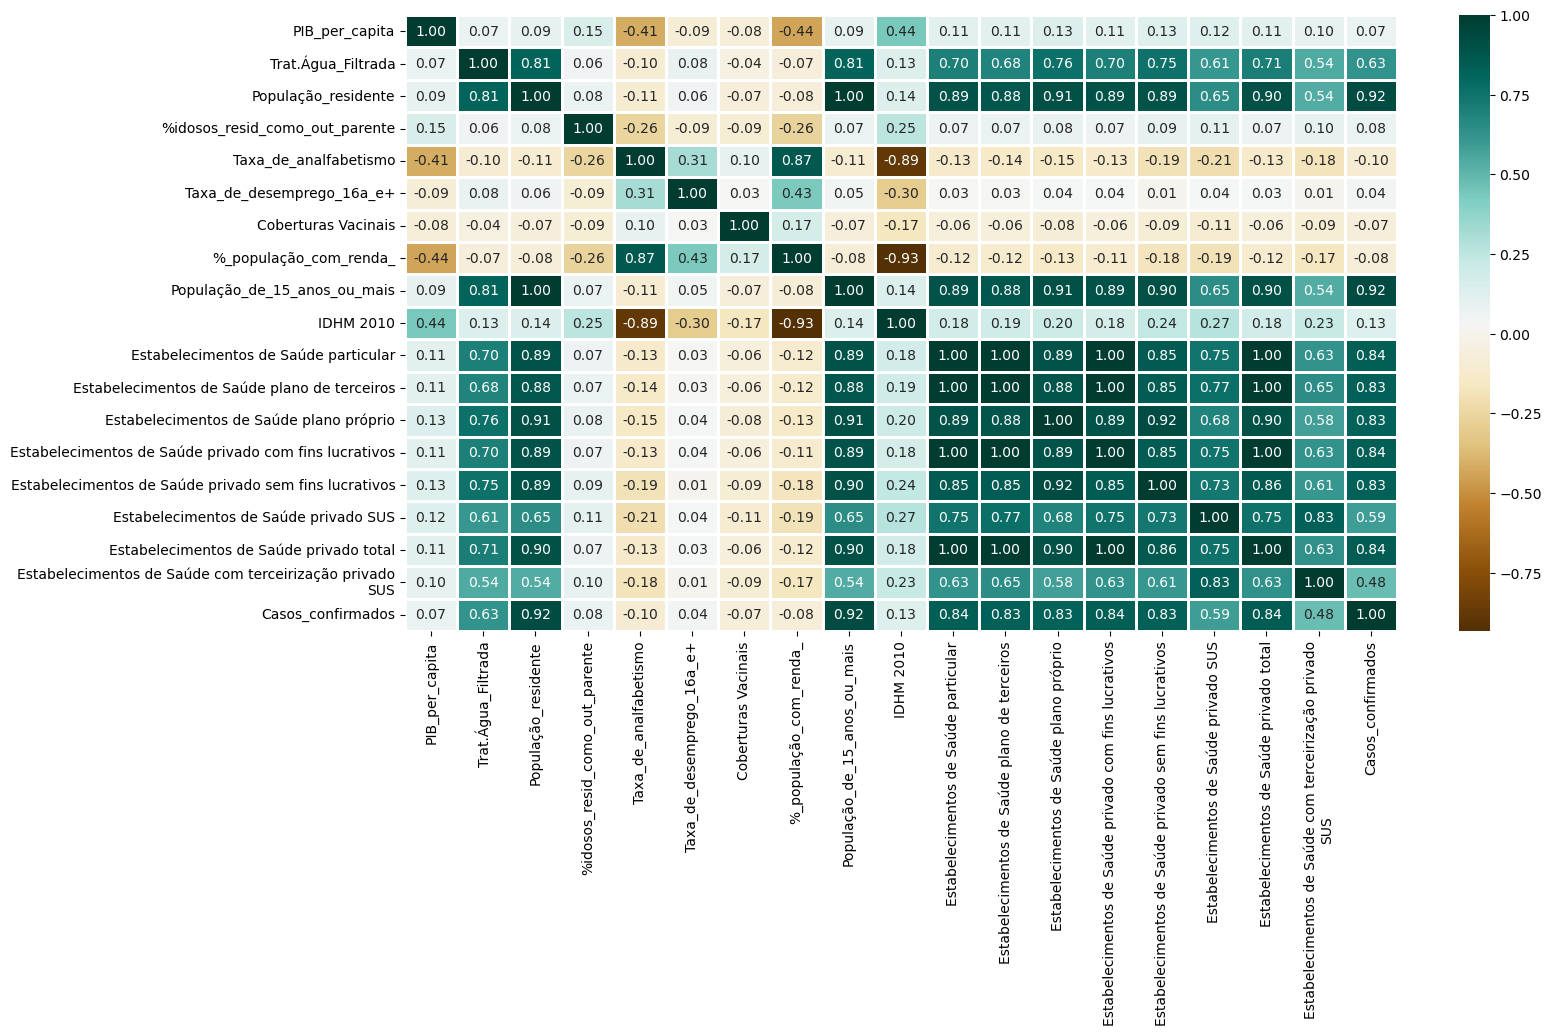

In [19]:
plt.figure(figsize=(16, 8))
sns.heatmap(var_quantitativas.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

### Dicionário:

- **Jogado em terreno baldio ou logradouro:** Número de moradores por lixo jogado em terreno baldio ou logradouro
- **Jogado em rio, lago ou mar:** Número de moradores por lixo jogado em rio, lago ou mar
- **Cobertura Vacinal** Porcentagem de Vacinas com Cobertura Adequada por município



**Estrutura do Projeto**

Serão exploradas técnicas de regressão para a previsão da variável quantitativa "Quantidade de Desistência no Curso". A qualidade da comunicação e apresentação dos resultados também será uma prioridade, assegurando que os resultados sejam compreensíveis para um público amplo.

Este projeto tem como objetivo fornecer previsões robustas e ir além de uma simples análise exploratória de dados. Espera-se que a análise e modelos desenvolvidos ajudem a entender e prever as desistências em cursos de graduação, o que pode ter implicações importantes na melhoria da Educação Superior.

### Merge dos Dados

In [20]:
o

NameError: name 'o' is not defined

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(dados.corr(),
			 annot=True, cmap="PiYG_r", linewidths=.5)


ValueError: could not convert string to float: 'Fonte: Censo da Educação Superior/Inep.'

<Figure size 2000x2000 with 0 Axes>

### Data Processing

Categorical variables: 6
Integer variables: 0
Float variables: 25


['Categoria Administrativa', 'Organização Acadêmica', 'Código do Curso de Graduação', 'Código da Região Geográfica do Curso', 'Código da Unidade Federativa do Curso', 'Código do Município do Curso', 'Grau Acadêmico', 'Modalidade de Ensino', 'Código da Grande Área do Curso segundo a classificação CINE BRASIL', 'Ano de Ingresso', 'Ano de Referência', 'Prazo de Integralização em Anos', 'Ano de Integralização do Curso', 'Prazo de Acompanhamento do Curso em anos', 'Ano Máximo de Acompanhamento do Curso', 'Quantidade de Ingressantes no Curso', 'Quantidade de Permanência no Curso no ano de referência', 'Quantidade de Concluintes no Curso no ano de referência', 'Quantidade de Desistência no Curso no ano de referência', 'Quantidade de Falecimentos no Curso no ano de referência', 'Taxa de Permanência - TAP', 'Taxa de Conclusão Acumulada - TCA', 'Taxa de Desistência Acumulada - TDA', 'Taxa de Conclusão Anual - TCAN', 'Taxa de Desistência Anual - TADA']


<AxesSubplot:>

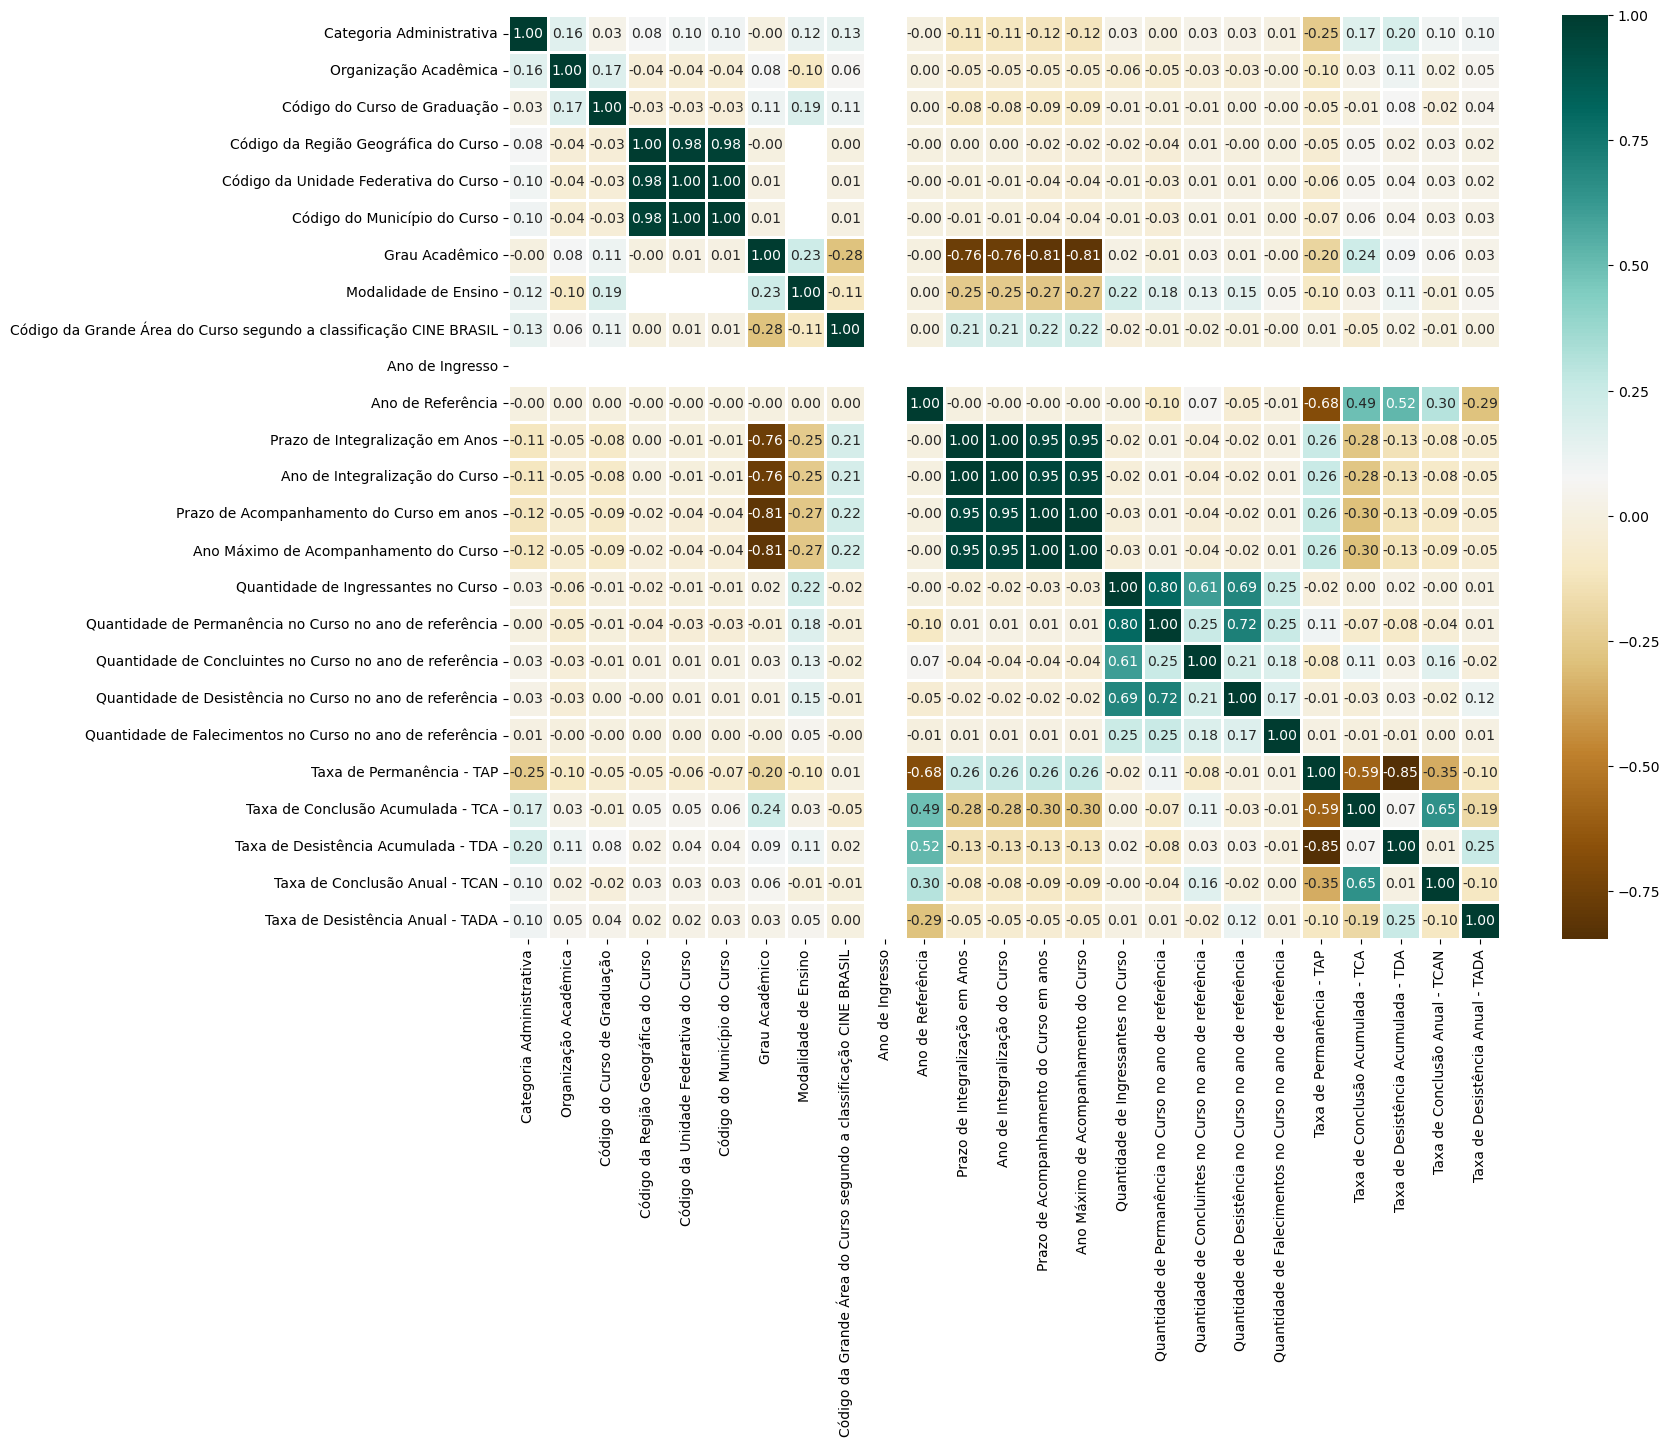

# Minerando Dados e Características do Dataset

# Modelos de Predição

# Processo e Estatísticas de Validação

# Conclusão 

# Referências Bibliográficas